In [1]:
from __future__ import print_function

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
from ipywidgets import fixed, interact, interact_manual, interactive
from natsort import index_natsorted
from scipy.stats import norm

%load_ext line_profiler
%matplotlib inline
pyo.init_notebook_mode(connected=True)

## AMRFinder Plus

In [2]:
import glob

pvals_list = glob.glob("./figs/fig4/fig4c/amrfinder/*/pvals*")

In [3]:
from statsmodels.stats.multitest import multipletests

def read_df(path, alpha=0.05, name="all", df=None):
    x = pd.read_csv(path, sep="\t", names=["Ab", "year", "p-val"])
    p_values = x["p-val"].tolist()

    # Filter out NaN values from the p-values list
    filtered_p_values = [p for p in p_values if not np.isnan(p)]

    # Perform Benjamini-Hochberg correction on non-NaN p-values
    rejected, corrected_p_values, _, _ = multipletests(
        filtered_p_values, method="fdr_bh"
    )

    # Create a new list to hold the corrected p-values including NaN values
    corrected_p_values_with_nan = []
    idx = 0
    for p in p_values:
        if np.isnan(p):
            corrected_p_values_with_nan.append(np.nan)
        else:
            corrected_p_values_with_nan.append(corrected_p_values[idx])
            idx += 1

    # Create a new column in the DataFrame for the corrected p-values
    x["corrected_p_value"] = corrected_p_values_with_nan
    x["corrected_abname"] = x["Ab"].str.title()
    x["Subset"] = name
    if df is not None:
        combined_df = pd.concat([x, df], ignore_index=True)
        return combined_df
    else:
        return x


df = read_df("./figs/fig4/fig4c/amrfinder/all/pvals-all", name="All", df=None)
# df = read_df("./figs/fig4/fig4c/amrfinder/eskape/pvals-eskape", name="ESKAPE", df=None)
# df = read_df("./figs/fig4/fig4c/amrfinder/ecoli/pvals-ecoli", name = 'E. coli', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/kleb/pvals-kleb", name = 'K. pneumoniae', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/salm/pvals-salm", name = 'S. enterica', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/staph/pvals-staph", name = 'S. aureus', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/streppneumo/pvals-streppneumo", name = 'S. pneumoniae', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/enterococcusfaecium/pvals-faecium", name = 'E. faecium', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/acinetobacter/pvals-acineto", name = 'A. baumannii', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/pseud/pvals-pseud", name = 'P. aeruginosa', df=df)
# df = read_df("./figs/fig4/fig4c/amrfinder/enterobacter/pvals-enterobacter", name = 'Enterobacter', df=df)

# Dictionary mapping drug names to mechanisms of action
mechanism_of_action = {
    'FOSFOMYCIN': 'Cell wall synthesis inhibitor',
    'BETA-LACTAM': 'Cell wall synthesis inhibitor',
    'PHENICOL-QUINOLONE': 'Protein synthesis inhibitor',
    'TETRACYCLINE': 'Protein synthesis inhibitor',
    'CEPHALOSPORIN': 'Cell wall synthesis inhibitor',
    'COLISTIN': 'Cell membrane disruptor',
    'SULFONAMIDE': 'Folic acid synthesis inhibitor',
    'QUINOLONE': 'DNA gyrase/topoisomerase inhibitor',
    'STREPTOMYCIN': 'Protein synthesis inhibitor',
    'CHLORAMPHENICOL': 'Protein synthesis inhibitor',
    'KANAMYCIN': 'Protein synthesis inhibitor',
    'MACROLIDE': 'Protein synthesis inhibitor',
    'FLUOROQUINOLONE': 'DNA gyrase/topoisomerase inhibitor',
    'TRIMETHOPRIM': 'Folic acid synthesis inhibitor'
}

# Create the new column using the map() function
df['Mechanism of Action'] = df['Ab'].map(mechanism_of_action)

df

,Ab,year,p-val,corrected_p_value,corrected_abname,Subset,Mechanism of Action
0,FOSFOMYCIN,1971,0.147840,0.172480,Fosfomycin,All,Cell wall synthesis inhibitor
1,BETA-LACTAM,1943,0.000010,0.000147,Beta-Lactam,All,Cell wall synthesis inhibitor
2,PHENICOL-QUINOLONE,1949,0.222730,0.222730,Phenicol-Quinolone,All,Protein synthesis inhibitor
3,TETRACYCLINE,1948,0.182891,0.196959,Tetracycline,All,Protein synthesis inhibitor
4,CEPHALOSPORIN,1964,0.000221,0.000695,Cephalosporin,All,Cell wall synthesis inhibitor
5,COLISTIN,1959,0.004574,0.007114,Colistin,All,Cell membrane disruptor
6,SULFONAMIDE,1936,0.003856,0.006747,Sulfonamide,All,Folic acid synthesis inhibitor
7,QUINOLONE,1962,0.003230,0.006461,Quinolone,All,DNA gyrase/topoisomerase inhibitor
8,STREPTOMYCIN,1948,0.000043,0.000298,Streptomycin,All,Protein synthesis inhibitor
9,CHLORAMPHENICOL,1949,0.000248,0.000695,Chloramphenicol,All,Protein synthesis inhibitor


/tmp/ipykernel_57595/3093557203.py:28: UserWarning:

FixedFormatter should only be used together with FixedLocator



<Figure size 504x216 with 0 Axes>

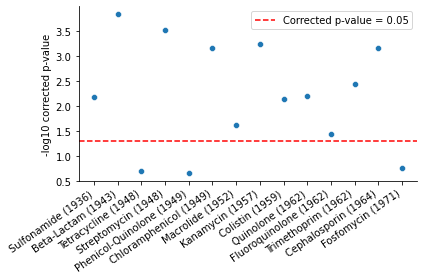

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the figure size
plt.figure(figsize=(7, 3))  # Specify width and height in inches

# Create a figure and axes
fig, ax = plt.subplots()

# Sort the dataframe by the 'year' column
sorted_df = df.sort_values("year")

# Calculate -log10 of the corrected p-values
sorted_df["-log10_pval"] = -np.log10(sorted_df["corrected_p_value"])

# Plot the -log1- p-values
sns.scatterplot(
    data=sorted_df,
    x="corrected_abname",
    y="-log10_pval",
    # hue="Mechanism of Action",
    ax=ax,
)
sns.despine()

# Set x-axis tick labels as 'Drug Name (Year Introduced)'
ax.set_xticklabels(
    [
        f"{name} ({year})"
        for name, year in zip(
            sorted_df.drop_duplicates("corrected_abname")["corrected_abname"],
            sorted_df.drop_duplicates("corrected_abname")["year"],
        )
    ],
    rotation=35,
    ha="right",
)

# Add a horizontal dashed red line denoting the -log2 of 0.05
ax.axhline(
    -np.log10(0.05),
    color="red",
    linestyle="--",
    label="Corrected p-value = 0.05",
)

# Set the labels for x-axis and y-axis
ax.set_xlabel("")
ax.set_ylabel("-log10 corrected p-value")

# Set the title of the plot
ax.set_title("")

# Add a legend
ax.legend(loc="upper right")

# Adjust the layout of the plot
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig("./figs/fig3/fig3c/amrfinder/plots/amrfinder_all.svg", dpi=300, bbox_inches='tight')
# plt.savefig("./figs/fig4/fig4c/amrfinder/plots/amrfinder_ecoli-kleb-staph.svg", dpi=300, bbox_inches='tight')
# plt.savefig("./figs/fig4/fig4c/amrfinder/plots/amrfinder_all-ecoli-kleb-staph.svg", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# RGI

In [35]:
alldf = pd.read_csv(
    "./pvals-all-all",
    sep="\t",
    names=["Ab", "Year Introduced", "P-val"],
)
alldf

,Ab,Year Introduced,P-val
0,fluoroquinolone antibiotic,1962,0.979500
1,penam,1943,0.992601
2,cephalosporin,1964,0.730050
3,tetracycline antibiotic,1948,0.995165
4,phenicol antibiotic,1949,0.354162
5,macrolide antibiotic,1952,0.600525
6,rifamycin antibiotic,1963,0.148628
7,aminoglycoside antibiotic,1946,0.802366
8,carbapenem,1985,0.983885
9,monobactam,1986,0.959414


In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def format_ab_name(ab_name):
    first_word = ab_name.split()[0]
    return first_word.capitalize()


alldf["Formatted_Ab_Year"] = (
    alldf["Ab"].apply(format_ab_name)
    + " ("
    + alldf["Year Introduced"].astype(str)
    + ")"
)

# Assuming 'alldf' is your pandas dataframe
alldf["Ab_Year"] = alldf["Ab"] + " (" + alldf["Year Introduced"].astype(str) + ")"

# Group antibiotics by mechanism of action
mechanism_of_action = {
    "Cell Wall Synthesis Inhibitors": [
        "penam",
        "cephalosporin",
        "carbapenem",
        "monobactam",
    ],
    "Protein Synthesis Inhibitors": [
        "tetracycline antibiotic",
        "phenicol antibiotic",
        "macrolide antibiotic",
        "aminoglycoside antibiotic",
        "lincosamide antibiotic",
        "glycopeptide antibiotic",
    ],
    "Nucleic Acid Synthesis Inhibitors": [
        "fluoroquinolone antibiotic",
        "rifamycin antibiotic",
    ],
    "Folate Antagonists": ["sulfonamide antibiotic"],
    "Other": ["nitrofuran antibiotic"],
}


def find_group(ab):
    for group, antibiotics in mechanism_of_action.items():
        if ab in antibiotics:
            return group
    return None


alldf["Group"] = alldf["Ab"].apply(find_group)
alldf = alldf.sort_values(by=["Group", "Year Introduced"])

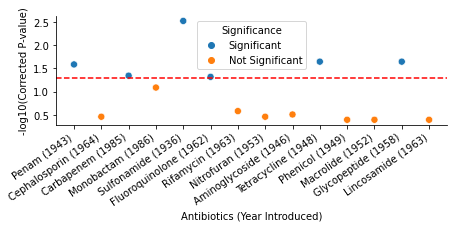

In [37]:
import numpy as np
from statsmodels.stats.multitest import fdrcorrection

# Create the figure and set its size
fig, ax = plt.subplots(figsize=(7, 2))

alldf["1_minus_P-val"] = alldf["P-val"].apply(lambda x: 1 - x if x > 0.5 else x)
alldf["Corrected P-val"] = fdrcorrection(alldf["1_minus_P-val"])[1]
alldf["log_normalized"] = -np.log10(alldf["Corrected P-val"])

# Add the significance threshold line
significance_threshold = -np.log10(0.05)
alldf["Significance"] = alldf["log_normalized"].apply(
    lambda x: "Significant" if x > significance_threshold else "Not Significant"
)

# Create the scatterplot
sns.scatterplot(
    x="Formatted_Ab_Year",
    y="log_normalized",
    hue="Significance",
    data=alldf,
    s=50,
    ax=ax,
)
sns.despine()
plt.xticks(rotation=35, ha="right")
ax.set_xlabel("Antibiotics (Year Introduced)", fontsize=10)
ax.set_ylabel("-log10(Corrected P-value)", fontsize=10)


ax.axhline(
    significance_threshold,
    linestyle="--",
    color="red",
    label=f"Significance threshold (p-value=0.05)",
)

# Save the figure as an SVG file with a DPI of 300
fig.savefig("figs/fig4/fig4c.svg", dpi=300, format="svg")

# Display the figure
plt.show()

In [8]:
eskapedf = pd.read_csv(
    "./pvals-eskape-all", sep="\t", names=["Ab", "Year Introduced", "P-val"]
)
eskapedf

,Ab,Year Introduced,P-val
0,fluoroquinolone antibiotic,1962,0.128497
1,penam,1943,0.203234
2,cephalosporin,1964,0.099007
3,tetracycline antibiotic,1948,0.353115
4,phenicol antibiotic,1949,0.340049
5,macrolide antibiotic,1952,0.198743
6,rifamycin antibiotic,1963,0.135427
7,aminoglycoside antibiotic,1946,0.211404
8,carbapenem,1985,0.001061
9,monobactam,1986,0.009767


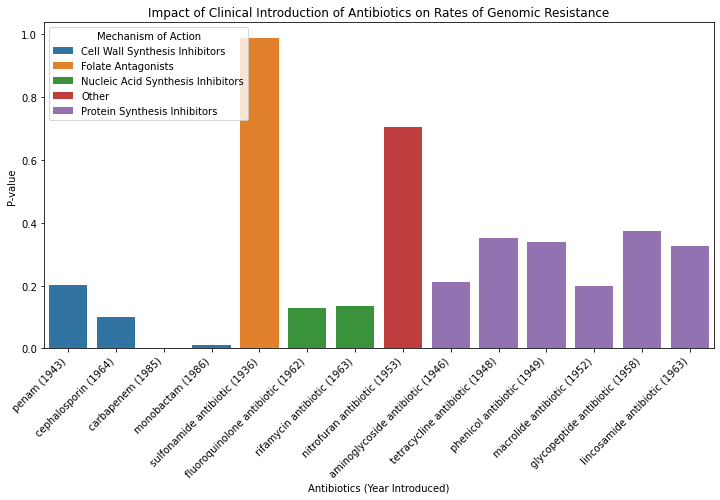

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming 'alldf' is your pandas dataframe
eskapedf["Ab_Year"] = (
    eskapedf["Ab"] + " (" + eskapedf["Year Introduced"].astype(str) + ")"
)

# Group antibiotics by mechanism of action
mechanism_of_action = {
    "Cell Wall Synthesis Inhibitors": [
        "penam",
        "cephalosporin",
        "carbapenem",
        "monobactam",
    ],
    "Protein Synthesis Inhibitors": [
        "tetracycline antibiotic",
        "phenicol antibiotic",
        "macrolide antibiotic",
        "aminoglycoside antibiotic",
        "lincosamide antibiotic",
        "glycopeptide antibiotic",
    ],
    "Nucleic Acid Synthesis Inhibitors": [
        "fluoroquinolone antibiotic",
        "rifamycin antibiotic",
    ],
    "Folate Antagonists": ["sulfonamide antibiotic"],
    "Other": ["nitrofuran antibiotic"],
}


def find_group(ab):
    for group, antibiotics in mechanism_of_action.items():
        if ab in antibiotics:
            return group
    return None


eskapedf["Group"] = eskapedf["Ab"].apply(find_group)
eskapedf = eskapedf.sort_values(by=["Group", "Year Introduced"])

# Plot the data using seaborn
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Ab_Year', y='P-val', hue='Group', data=eskapedf, dodge=False)
# plt.xticks(rotation=45, ha='right')
# plt.xlabel('Antibiotics (Year Introduced)')
# plt.ylabel('P-value')
# plt.title('Impact of Clinical Introduction of Antibiotics on Rates of Genomic Resistance')
# plt.legend(title='Mechanism of Action', loc='upper left')
# plt.show()

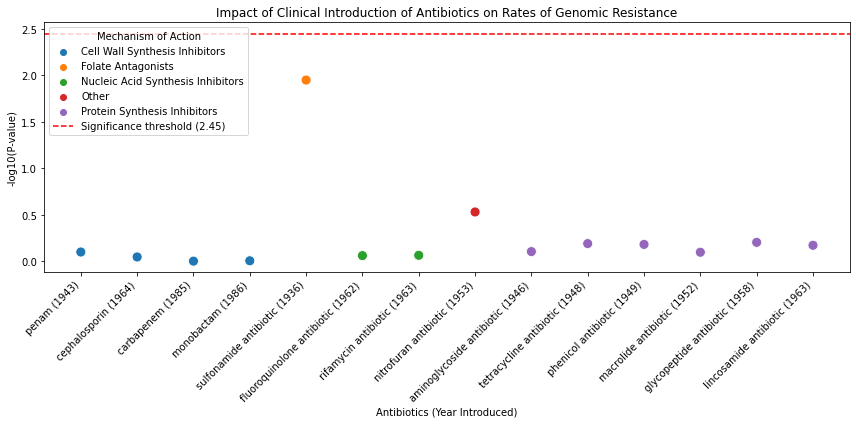

In [10]:
import numpy as np

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
eskapedf["1_minus_P-val"] = 1 - eskapedf["P-val"]
eskapedf["log_normalized"] = -np.log10(eskapedf["1_minus_P-val"])
sns.scatterplot(x="Ab_Year", y="log_normalized", hue="Group", data=eskapedf, s=100)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Antibiotics (Year Introduced)")
plt.ylabel("-log10(P-value)")
plt.title(
    "Impact of Clinical Introduction of Antibiotics on Rates of Genomic Resistance"
)

# Add a line indicating the significance threshold
significance_threshold = -np.log10(0.05 / 14)
plt.axhline(
    significance_threshold,
    linestyle="--",
    color="red",
    label=f"Significance threshold ({significance_threshold:.2f})",
)

plt.legend(title="Mechanism of Action", loc="upper left")
plt.tight_layout()
plt.show()